In [214]:
import itertools
import networkx as nx


#
# from neo4j_to_networkx import get_penalties_data
#
#
# def add_penalty_edges(graph):
#     penalties = get_penalties_data()  # данные о штрафах из файла
#     coordinate_nodes = list(graph.nodes)[:]  # получаем все координатные узлы и делаем копию на всякий случай
#     for node in coordinate_nodes:
#         in_edges = graph.in_edges(node, data=True)  # для каждой координатной точки ищем входящие и выходящие ребра
#         out_edges = graph.out_edges(node, data=True)
#         edge_pairs = list(itertools.product(in_edges, out_edges))  # находим пары ребер
#         for edge_pair in edge_pairs:
#             in_edge_link_type = edge_pair[0][2]['link_type_id']
#             out_edge_link_type = edge_pair[1][2]['link_type_id']
#             for data in penalties:
#                 if [in_edge_link_type, out_edge_link_type] == [data['link_type_id_1'], data['link_type_id_2']]:
#                         # and data['normal_penalty'] != 0:
#                     graph.add_edge(node, node, time=data['normal_penalty'], type='penalty')

def add_penalties(graph):
    
    #  получаем все координатные узлы
    coordinate_nodes = [(x, y) for x, y in graph.nodes(data=True) if y['type'] == 'coord']
    coordinate_edges = list(graph.edges())

    # для каждой координатной точки ищем входящие и выходящие ребра и составляем пары
    for node in coordinate_nodes:
        in_edges = list(graph.in_edges(node[0], data=True))[:]  
        out_edges = list(graph.out_edges(node[0], data=True))[:]
        
        in_edges_coords = [edge for edge in in_edges if (isinstance(edge[0], int) and isinstance(edge[1], int))]
        out_edges_coords = [edge for edge in out_edges if (isinstance(edge[0], int) and isinstance(edge[1], int))]
        
        edge_pairs = list(itertools.product(in_edges, out_edges))  # находим пары ребер
        

        # если у точки нет входящих/выходящих потоков (т.е. нет пар ребер)
        edge_pair_id = 1
#         if not in_edges:
#             graph.add_node(f'{node[0]}_out_{edge_pair_id}', node_pk=node[0], type='penalty_node')

#             for out_edge in out_edges:
#                 graph.add_edge(f'{node[0]}_out_{edge_pair_id}', out_edge[1])
#                 graph.remove_edge(out_edge[0], out_edge[1])
#             continue

#         elif not out_edges:
#             graph.add_node(f'{node[0]}_in_{edge_pair_id}', node_pk=node[0], type='penalty_node')
#             for out_edge in out_edges:
#                 graph.add_edge(f'{node[0]}_out_{edge_pair_id}', out_edge[0])
#                 graph.remove_edge(out_edge[0], out_edge[1])
#             continue
            
        for edge_pair in edge_pairs:
            edge_pair_id += 1
            # это точно делаем
            graph.add_node(f'{node[0]}_in_{edge_pair_id}', node_pk=node[0], type='penalty_node')
            graph.add_node(f'{node[0]}_out_{edge_pair_id}', node_pk=node[0], type='penalty_node')
            graph.add_edge(f'{node[0]}_in_{edge_pair_id}', f'{node[0]}_out_{edge_pair_id}',
                           time=1.01, type='penalty_edge') # штрафное ребро
            graph.add_edge(edge_pair[0][0], f'{node[0]}_in_{edge_pair_id}', **edge_pair[0][2])
            graph.add_edge(f'{node[0]}_out_{edge_pair_id}', edge_pair[1][1], **edge_pair[1][2])
            
            # ТЕПЕРЬ НУЖНО 
    graph.remove_edges_from(coordinate_edges)
            
#         graph.remove_node(node[0])
        
#     for node in coordinate_nodes:
#         graph.remove_node(node[0])
#         graph.add_node(node[0], **node[1])


def get_shortest_path(graph, source, target):
    nodes = list(graph.nodes(data=True))
    for node in nodes:
        if f'{source}_out' in str(node[0]):
            graph.add_edge(source, node[0], time=0)
        if f'{target}_in' in str(node[0]):
            graph.add_edge(node[0], target, time=0)

    shortest_path = nx.shortest_path(graph, source, target, weight='time')

    return shortest_path

[1, '2_in_3', '2_out_3', 4]
edges 12
nodes 12
nodes all [1, 2, 3, 4, '2_in_2', '2_out_2', '2_in_3', '2_out_3', '3_in_2', '3_out_2', '3_in_3', '3_out_3']


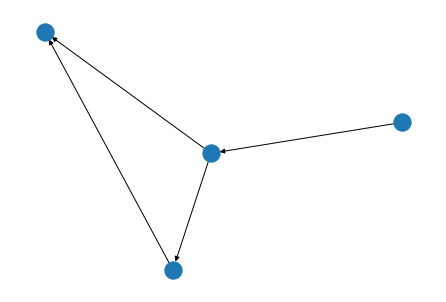

In [215]:
G = nx.MultiDiGraph()

node_ids = [1, 2, 3, 4]
for node in node_ids:
    G.add_node(node, node_pk=node, type='coord')

G.add_edge(1, 2, time=2)
G.add_edge(2, 3, time=3)
G.add_edge(3, 4, time=3)
G.add_edge(2, 4, time=7)


    # print(G.in_edges(2))
    # print(G.out_edges(2))
    # print(nx.shortest_path(G, 1, 4, weight='time'))
    #
    # print('edges', G.number_of_edges())
    # print('nodes', G.number_of_nodes())
    #
nx.draw(G)
add_penalties(G)


# print(get_shortest_path(G, 1, 4))


print(nx.shortest_path(G, 1, 4, weight='time'))

print('edges', G.number_of_edges())
print('nodes', G.number_of_nodes())
print('nodes all', G.nodes())

In [195]:
import matplotlib.pyplot as plt

# nodes_type_coord = [x for x, y in G.nodes(data=True) if y['type'] == 'coord']
nodes_type_coord = G.nodes()
print(nodes_type_coord)
nodes_coords = []
for node in nodes_type_coord:
    if len(str(node)) > 1:
        nodes_coords.append((int(node[-1]), int(node[0])))
    else:
        nodes_coords.append([int(node), 0])
    
# for node in nodes:
#     if len(str(node)) > 1:
#         nodes_coords.append((int(node[-1]), int(node[0])))
#     else:
#     nodes_coords.append((int(node), 0))
        
# for node in nodes_coords:
#     plt.plot(*node, 'r.')
    
# plt.show()

[1, 2, 3, 4, '2_in_2', '2_out_2', '2_in_3', '2_out_3', '3_in_2', '3_out_2']
